<img src="https://s2.glbimg.com/Bu6upvmSg6SRv0za635uXphThKo=/620x430/e.glbimg.com/og/ed/f/original/2020/03/28/mercado-livre.jpg" width=30%/>

# Data Science Challenge - Data & Analytics Team

## 3. Previsión de falla
### Descripción

Los galpones de Full de mercado libre cuentan con una flota de dispositivos que transmiten diariamente telemetría agregada en varios atributos.
Las técnicas de mantenimiento predictivo están diseñadas para ayudar a determinar la condición del equipo de mantenimiento en servicio para predecir cuándo se debe realizar el mantenimiento. Este enfoque promete ahorros de costos sobre el mantenimiento preventivo de rutina o basado en el tiempo porque las tareas se realizan solo cuando están justificadas.

### Entregable

Tiene la tarea de generar una Jupyter notebook con un modelo predictivo para predecir la probabilidad de falla del dispositivo con el objetivo de bajar los costos del proceso. Como una referencia, una falla de un dispositivo tiene un costo de 1 mientras el costo de un mantenimiento es 0,5. El archivo "full_devices.csv" tiene los valores diários para los 9 atributos de los dispositivos y la columna que está tratando de predecir se llama 'failure' con
el valor binario 0 para no fallar y 1 para fallar.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.pyplot import figure

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MELI/full_devices.csv', encoding='latin-1')

In [ ]:
df.shape

(124494, 12)

In [ ]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [ ]:
for i in df:
  print(df[i].value_counts())
  print("---"*20)

2015-01-01    1163
2015-01-02    1163
2015-01-03    1163
2015-01-04    1162
2015-01-05    1161
              ... 
2015-10-27      31
2015-10-29      31
2015-10-30      31
2015-10-31      31
2015-11-02      31
Name: date, Length: 304, dtype: int64
------------------------------------------------------------
Z1F0QLC1    304
S1F0KYCR    304
S1F0E9EP    304
S1F0EGMT    304
S1F0FGBQ    304
           ... 
W1F1CHZK      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
W1F1DA5ÿ      1
Name: device, Length: 1169, dtype: int64
------------------------------------------------------------
0    124388
1       106
Name: failure, dtype: int64
------------------------------------------------------------
57192360     26
89196552     26
165048912    26
169490248    23
57180136     15
             ..
181770800     1
201893264     1
238768304     1
53326688      1
17572840      1
Name: attribute1, Length: 123877, dtype: int64
------------------------------------------------------------
0        118110
2

In [ ]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

Não temos valores nulos.

In [ ]:
falhas = df.copy()

In [ ]:
# Dataframe apenas com linhas de dispositivos que falharam
falhas = falhas[falhas['failure'] == 1]

In [ ]:
falhas

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
4885,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
6879,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
8823,2015-01-09,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,8,0
11957,2015-01-13,W1F13SRV,1,188251248,2040,0,0,6,39345,32,32,1
12668,2015-01-14,W1F1230J,1,220461296,0,0,0,14,325125,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
109927,2015-08-04,W1F1CB5E,1,16043296,88,0,0,9,30,0,0,0
114251,2015-08-18,Z1F0MRPJ,1,65654088,0,0,0,9,298592,0,0,11
122118,2015-10-05,S1F0JGJV,1,13739704,0,0,18,8,343760,0,0,0
122808,2015-10-09,Z1F14BGY,1,85259320,0,0,164,8,262932,0,0,0


In [ ]:
falhas['device'].nunique()

106

In [ ]:
# Dataframe apenas com linhas sem falha
sem_falhas = df.copy()
sem_falhas = sem_falhas[sem_falhas['failure'] == 0]
sem_falhas.shape

(124388, 12)

In [ ]:
# Merge nos dois datasets com e sem falhas, cruzando com devices que falharam
df_novo = falhas.merge(sem_falhas, on='device', how='inner')

In [ ]:
df_novo['device'].nunique()

106

Temos 106 dispositivos que falharam.

In [ ]:
df_novo.shape

(10607, 23)

In [ ]:
df_novo.columns

Index(['date_x', 'device', 'failure_x', 'attribute1_x', 'attribute2_x',
       'attribute3_x', 'attribute4_x', 'attribute5_x', 'attribute6_x',
       'attribute7_x', 'attribute8_x', 'attribute9_x', 'date_y', 'failure_y',
       'attribute1_y', 'attribute2_y', 'attribute3_y', 'attribute4_y',
       'attribute5_y', 'attribute6_y', 'attribute7_y', 'attribute8_y',
       'attribute9_y'],
      dtype='object')

In [ ]:
df_novo

,date_x,device,failure_x,attribute1_x,attribute2_x,attribute3_x,attribute4_x,attribute5_x,attribute6_x,attribute7_x,...,failure_y,attribute1_y,attribute2_y,attribute3_y,attribute4_y,attribute5_y,attribute6_y,attribute7_y,attribute8_y,attribute9_y
0,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,...,0,5230888,2288,0,37,8,39267,24,24,1
1,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,...,0,13307628,64776,0,49,8,39267,56,56,1
2,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,...,0,26258330,64776,0,135,8,39267,56,56,1
3,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,...,0,37985862,64776,0,763,8,39267,56,56,1
4,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,...,0,50147888,528,0,4,9,381198,32,32,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10602,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,...,0,240025832,0,0,0,9,351917,16,16,0
10603,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,...,0,112824920,0,0,0,9,352949,16,16,0
10604,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,...,0,52620456,0,0,0,9,352949,16,16,0
10605,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,...,0,154144032,0,0,0,9,352949,16,16,0


In [ ]:
# Splittando o dataframe merged em dois datasets

df_x = df_novo[['date_x', 'device', 'failure_x', 'attribute1_x', 'attribute2_x',
       'attribute3_x', 'attribute4_x', 'attribute5_x', 'attribute6_x',
       'attribute7_x', 'attribute8_x', 'attribute9_x']]
df_y = df_novo[['date_y', 'device', 'failure_y',
       'attribute1_y', 'attribute2_y', 'attribute3_y', 'attribute4_y',
       'attribute5_y', 'attribute6_y', 'attribute7_y', 'attribute8_y',
       'attribute9_y']]
display(df_x)
display(df_y)

,date_x,device,failure_x,attribute1_x,attribute2_x,attribute3_x,attribute4_x,attribute5_x,attribute6_x,attribute7_x,attribute8_x,attribute9_x
0,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
1,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
2,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
3,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
4,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10602,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,22,0
10603,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,22,0
10604,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,22,0
10605,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,22,0


,date_y,device,failure_y,attribute1_y,attribute2_y,attribute3_y,attribute4_y,attribute5_y,attribute6_y,attribute7_y,attribute8_y,attribute9_y
0,2015-01-01,S1F0RRB1,0,5230888,2288,0,37,8,39267,24,24,1
1,2015-01-02,S1F0RRB1,0,13307628,64776,0,49,8,39267,56,56,1
2,2015-01-03,S1F0RRB1,0,26258330,64776,0,135,8,39267,56,56,1
3,2015-01-04,S1F0RRB1,0,37985862,64776,0,763,8,39267,56,56,1
4,2015-01-01,S1F0CTDN,0,50147888,528,0,4,9,381198,32,32,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10602,2015-10-21,W1F0T0B1,0,240025832,0,0,0,9,351917,16,16,0
10603,2015-10-22,W1F0T0B1,0,112824920,0,0,0,9,352949,16,16,0
10604,2015-10-23,W1F0T0B1,0,52620456,0,0,0,9,352949,16,16,0
10605,2015-10-24,W1F0T0B1,0,154144032,0,0,0,9,352949,16,16,0


In [ ]:
df_x = df_x.rename(columns={
    'date_x':'date',
    'failure_x':'failure',
    'attribute1_x':'attribute1', 
    'attribute2_x':'attribute2', 
    'attribute3_x':'attribute3', 
    'attribute4_x':'attribute4', 
    'attribute5_x':'attribute5', 
    'attribute6_x':'attribute6', 
    'attribute7_x':'attribute7', 
    'attribute8_x':'attribute8', 
    'attribute9_x':'attribute9'})

df_y = df_y.rename(columns={
    'date_y':'date',
    'failure_y':'failure',
    'attribute1_y':'attribute1', 
    'attribute2_y':'attribute2', 
    'attribute3_y':'attribute3', 
    'attribute4_y':'attribute4', 
    'attribute5_y':'attribute5', 
    'attribute6_y':'attribute6', 
    'attribute7_y':'attribute7', 
    'attribute8_y':'attribute8', 
    'attribute9_y':'attribute9'})

display(df_x)
display(df_y)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
1,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
2,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
3,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
4,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10602,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,22,0
10603,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,22,0
10604,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,22,0
10605,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,22,0


,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F0RRB1,0,5230888,2288,0,37,8,39267,24,24,1
1,2015-01-02,S1F0RRB1,0,13307628,64776,0,49,8,39267,56,56,1
2,2015-01-03,S1F0RRB1,0,26258330,64776,0,135,8,39267,56,56,1
3,2015-01-04,S1F0RRB1,0,37985862,64776,0,763,8,39267,56,56,1
4,2015-01-01,S1F0CTDN,0,50147888,528,0,4,9,381198,32,32,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10602,2015-10-21,W1F0T0B1,0,240025832,0,0,0,9,351917,16,16,0
10603,2015-10-22,W1F0T0B1,0,112824920,0,0,0,9,352949,16,16,0
10604,2015-10-23,W1F0T0B1,0,52620456,0,0,0,9,352949,16,16,0
10605,2015-10-24,W1F0T0B1,0,154144032,0,0,0,9,352949,16,16,0


In [ ]:
# Concatenando os dfs x e y
df_novo2 = pd.concat([df_x, df_y], axis=0)
df_novo2

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
1,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
2,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
3,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
4,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10602,2015-10-21,W1F0T0B1,0,240025832,0,0,0,9,351917,16,16,0
10603,2015-10-22,W1F0T0B1,0,112824920,0,0,0,9,352949,16,16,0
10604,2015-10-23,W1F0T0B1,0,52620456,0,0,0,9,352949,16,16,0
10605,2015-10-24,W1F0T0B1,0,154144032,0,0,0,9,352949,16,16,0


In [ ]:
df_novo2['device'].value_counts()

W1F0T0B1    596
Z1F14BGY    562
S1F0JGJV    554
Z1F0MRPJ    458
W1F11ZG9    456
           ... 
W1F0PNA5     16
S1F10E6M     12
S1F0CTDN     12
S1F11MB0     12
S1F0RRB1      8
Name: device, Length: 106, dtype: int64

In [ ]:
df_novo2.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [ ]:
# Visualizando distribuição de valores

for i in df_novo2:
  fig = px.histogram(df_novo2, x = i)
  fig.show()

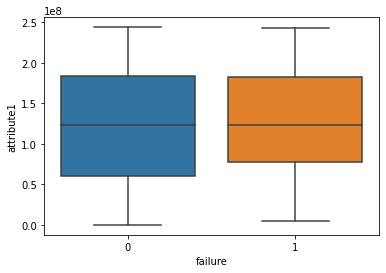

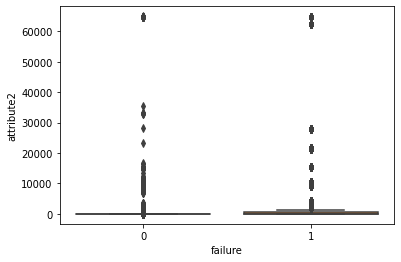

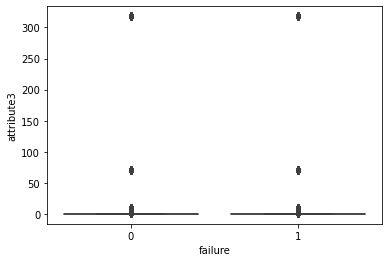

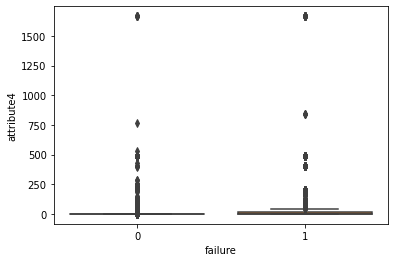

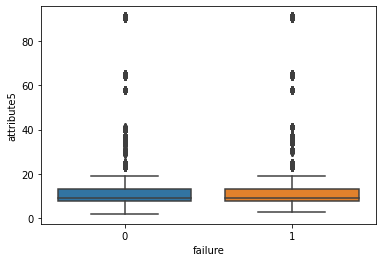

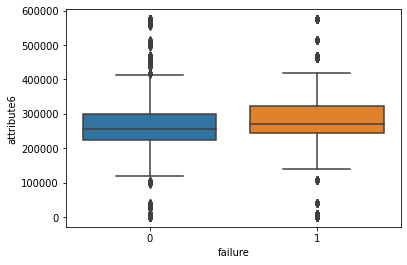

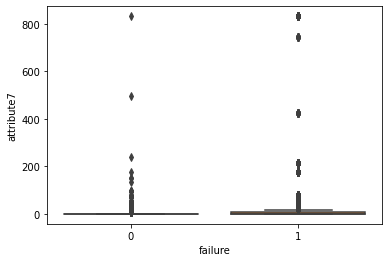

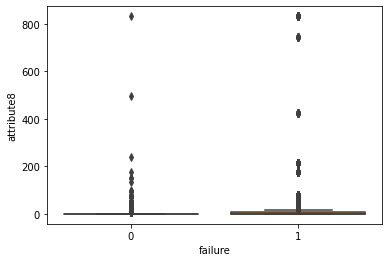

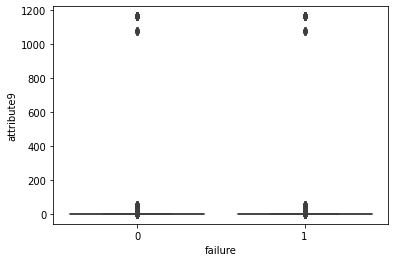

In [ ]:
# Buscando outliers

for i in df_novo2:
  if i == 'device':
    continue
  elif i == 'date':
    continue
  elif i == 'failure':
    continue
  ax = sns.boxplot(x='failure', y=i, data=df_novo2)
  plt.show()

Como os atributos parecem ser valores específicos, creio que seja arriscado tratar outliers.

In [ ]:
# Correlação inicial

corrPearson = df_novo2.corr('pearson')[['failure']].sort_values(by='failure', ascending=False)
print(corrPearson)

             failure
failure     1.000000
attribute2  0.177807
attribute7  0.135281
attribute8  0.135281
attribute4  0.134664
attribute6  0.082542
attribute1  0.012781
attribute5  0.008079
attribute9  0.000713
attribute3  0.000007


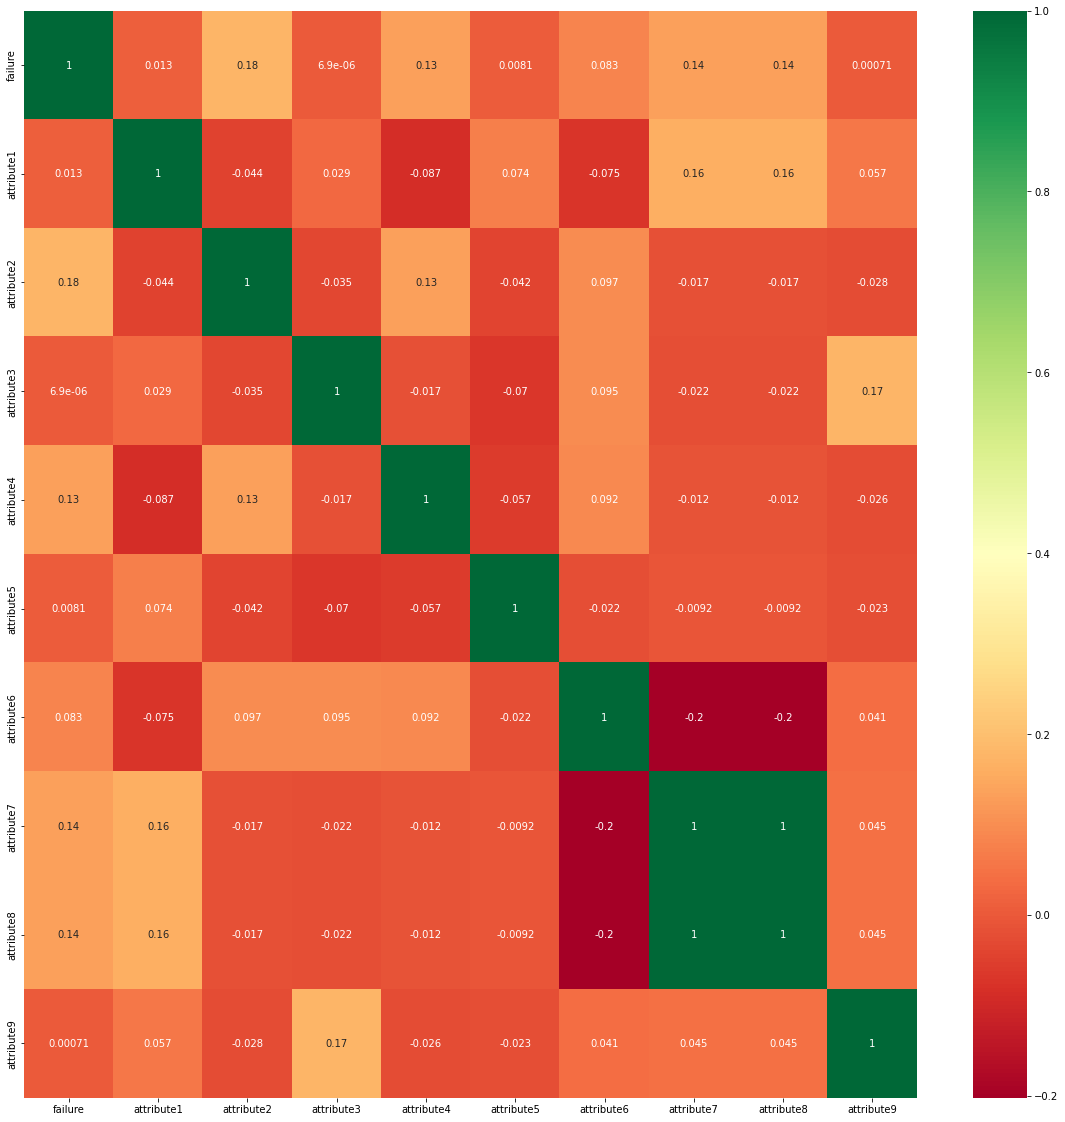

In [ ]:
corrmat = df_novo2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_novo2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Considerações:** Aparentemente a falha não tem nenhuma forte correlação com as features, a maior é com o atributo 2.

In [ ]:
df_novo2 = df_novo2.sort_values(by='device', ascending=False)

In [ ]:
df_novo2

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
5558,2015-01-02,Z1F1VQFY,0,41152944,0,0,0,6,225283,0,0,0
5677,2015-06-26,Z1F1VQFY,0,193955488,0,0,0,7,264217,0,0,0
5676,2015-06-30,Z1F1VQFY,1,178051496,0,0,0,7,265316,0,0,0
5677,2015-06-30,Z1F1VQFY,1,178051496,0,0,0,7,265316,0,0,0
5678,2015-06-30,Z1F1VQFY,1,178051496,0,0,0,7,265316,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
81,2015-01-19,S1F023H2,1,64499464,0,0,1,19,514661,16,16,3
80,2015-01-19,S1F023H2,1,64499464,0,0,1,19,514661,16,16,3
78,2015-01-19,S1F023H2,1,64499464,0,0,1,19,514661,16,16,3
77,2015-01-19,S1F023H2,1,64499464,0,0,1,19,514661,16,16,3


In [ ]:
df_novo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21214 entries, 5558 to 93
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        21214 non-null  object
 1   device      21214 non-null  object
 2   failure     21214 non-null  int64 
 3   attribute1  21214 non-null  int64 
 4   attribute2  21214 non-null  int64 
 5   attribute3  21214 non-null  int64 
 6   attribute4  21214 non-null  int64 
 7   attribute5  21214 non-null  int64 
 8   attribute6  21214 non-null  int64 
 9   attribute7  21214 non-null  int64 
 10  attribute8  21214 non-null  int64 
 11  attribute9  21214 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 2.1+ MB


In [ ]:
# Importando libs
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df_novo2.drop(columns={'failure','date','device'})
y = df_novo2['failure']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
from pandas.core.common import random_state
rs = 22

# Criação de lista com modelos de classificação
classifiers_list = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, random_state=rs),
    SVC(random_state=rs),
    LogisticRegression(random_state=rs),
    DecisionTreeClassifier(random_state=rs),
    RandomForestClassifier(random_state=rs),
    AdaBoostClassifier(random_state=rs),
    GradientBoostingClassifier(random_state=rs),
    ExtraTreesClassifier(random_state=rs)
]

KNeighborsClassifier(n_neighbors=3)
model score: 0.991


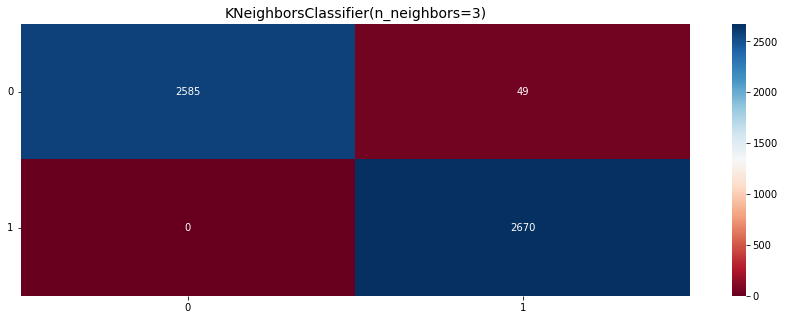

------------------------------------------------------------------------------------------
SVC(C=0.025, probability=True, random_state=22)
model score: 0.658


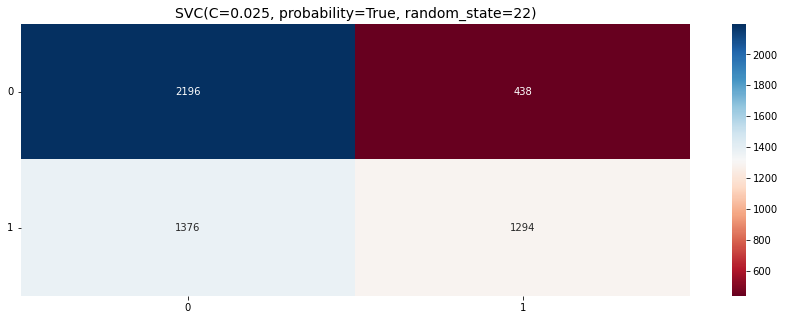

------------------------------------------------------------------------------------------
SVC(random_state=22)
model score: 0.741


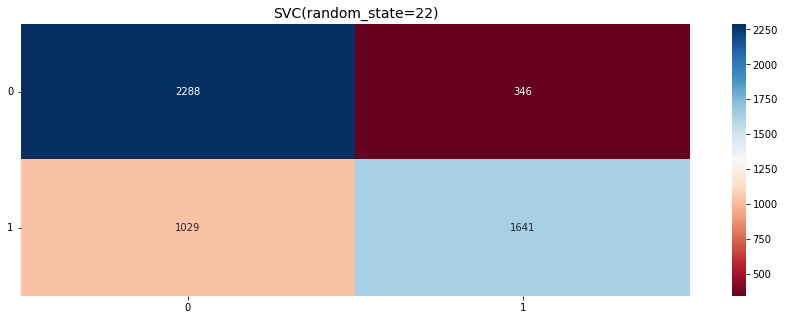

------------------------------------------------------------------------------------------
LogisticRegression(random_state=22)
model score: 0.685


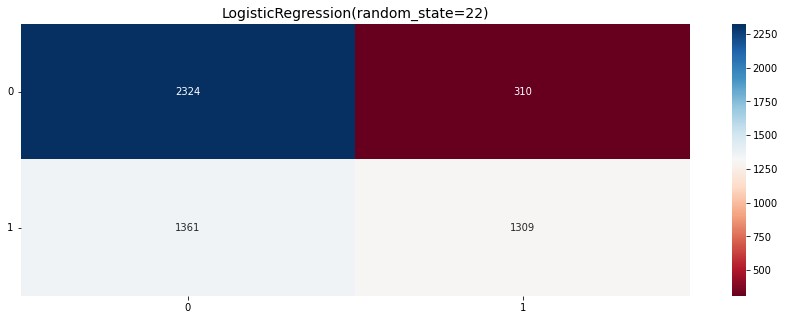

------------------------------------------------------------------------------------------
DecisionTreeClassifier(random_state=22)
model score: 0.995


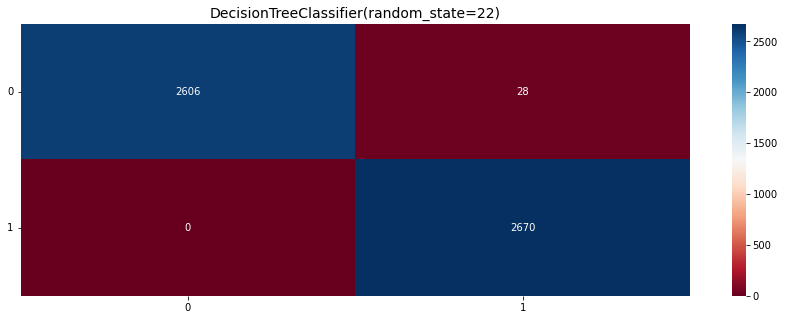

------------------------------------------------------------------------------------------
RandomForestClassifier(random_state=22)
model score: 0.997


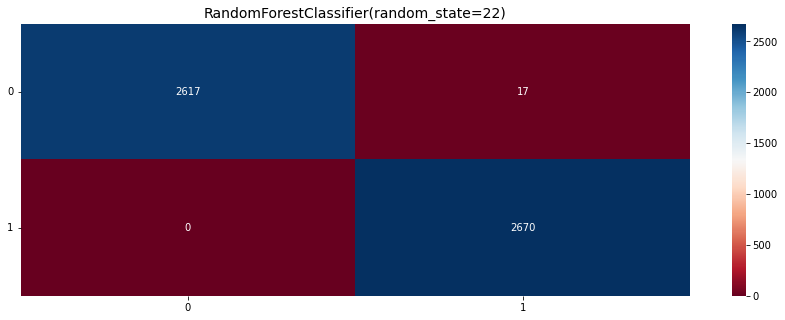

------------------------------------------------------------------------------------------
AdaBoostClassifier(random_state=22)
model score: 0.846


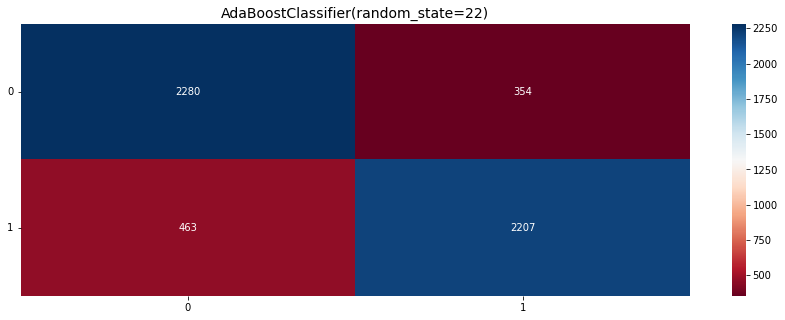

------------------------------------------------------------------------------------------
GradientBoostingClassifier(random_state=22)
model score: 0.923


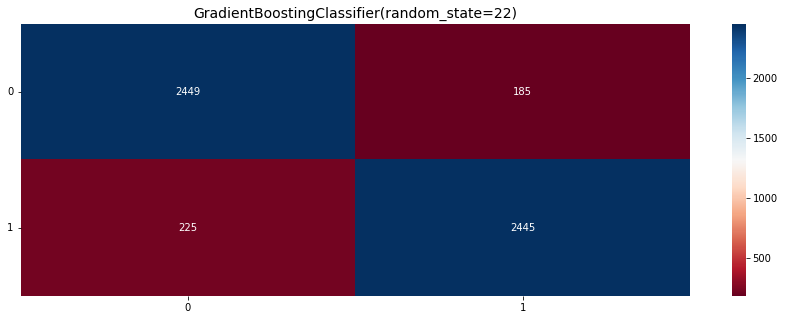

------------------------------------------------------------------------------------------
ExtraTreesClassifier(random_state=22)
model score: 0.998


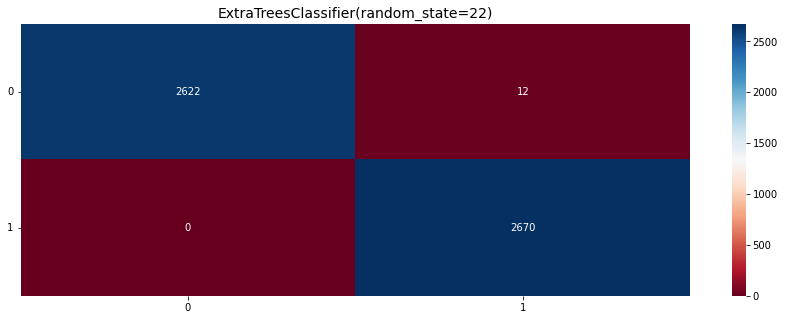

------------------------------------------------------------------------------------------


In [ ]:
# Aplicação de loop usando pipeline em cada modelo

for classifier in classifiers_list:
    pipe = Pipeline(steps=[("stdscaler", StandardScaler()), ("classifier", classifier)])
    pipe.fit(X_train, y_train)
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

    # Matriz de confusão com cada modelo
    from sklearn.metrics import confusion_matrix

    y_pred = pipe.predict(X_test)

    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(15,5))
    sns.heatmap(conf,annot=True,fmt="d",cmap='RdBu')
    plt.title(classifier,fontsize=14)
    plt.yticks(rotation =0)
    plt.show()
    print("---"*30)

**Considerações:** Aparentemente o ExtraTreesClassifier performou melhor do que os outros, com score de 99,8%, errando apenas 12 previsões, dizendo que não falhariam mas falharam, o que custaria 0,6 para o MELI. Porém, vou realizar outro teste dando shuffle no dataframe para ver se os resultados serão parecidos. 

In [ ]:
# Criação de X e y
df_shuffled = df_novo2.copy()
df_shuffled = df_shuffled.sample(frac=1)
df_shuffled

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
1622,2015-04-03,W1F1CDDP,1,180215128,2256,0,12,8,190301,32,32,0
1421,2015-03-24,Z1F0QH0C,1,38345816,920,1,1,8,233709,0,0,0
3731,2015-05-13,S1F0GKL6,1,160459104,0,0,2,90,249366,0,0,0
162,2015-01-15,W1F15S4D,0,155329008,1848,0,74,6,103918,16,16,0
4528,2015-05-21,W1F0WBTM,1,91542544,0,2,0,12,265506,16,16,41
...,...,...,...,...,...,...,...,...,...,...,...,...
976,2015-01-15,W1F19BPT,0,200013288,16,0,0,23,45,0,0,0
2400,2015-02-16,W1F1BZTM,0,184273816,0,0,0,13,44,0,0,5
4026,2015-05-18,W1F03D4L,1,80616240,27856,0,173,17,342856,0,0,5
6489,2015-02-21,S1F0GPFZ,0,32589672,0,0,0,9,223214,0,0,0


In [ ]:
X = df_shuffled.drop(columns={'failure','date','device'})
y = df_shuffled['failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

KNeighborsClassifier(n_neighbors=3)
model score: 0.994


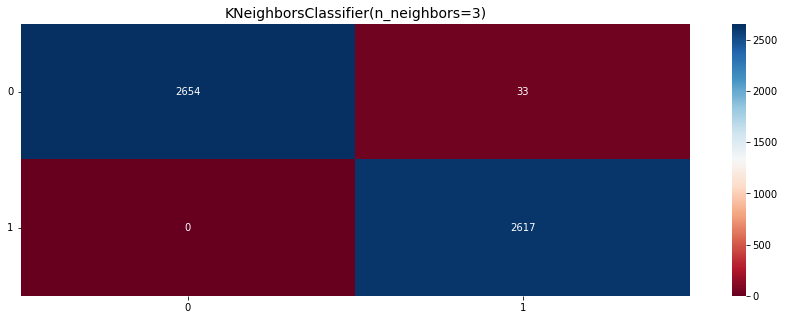

------------------------------------------------------------------------------------------
SVC(C=0.025, probability=True, random_state=22)
model score: 0.683


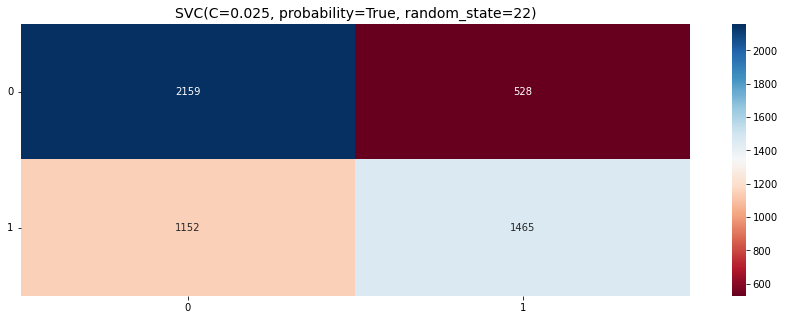

------------------------------------------------------------------------------------------
SVC(random_state=22)
model score: 0.732


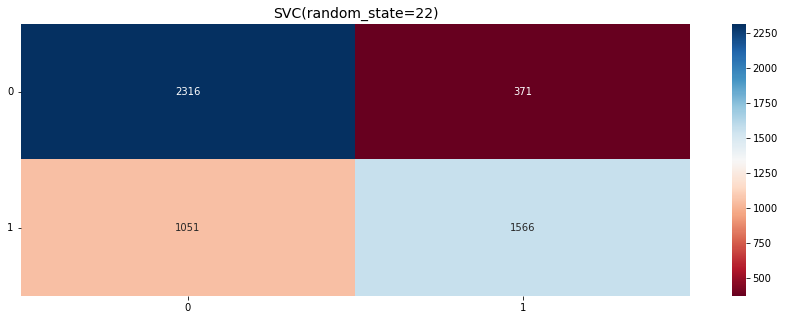

------------------------------------------------------------------------------------------
LogisticRegression(random_state=22)
model score: 0.679


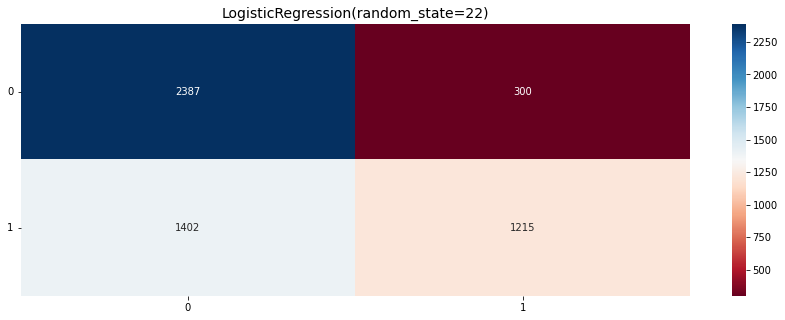

------------------------------------------------------------------------------------------
DecisionTreeClassifier(random_state=22)
model score: 0.994


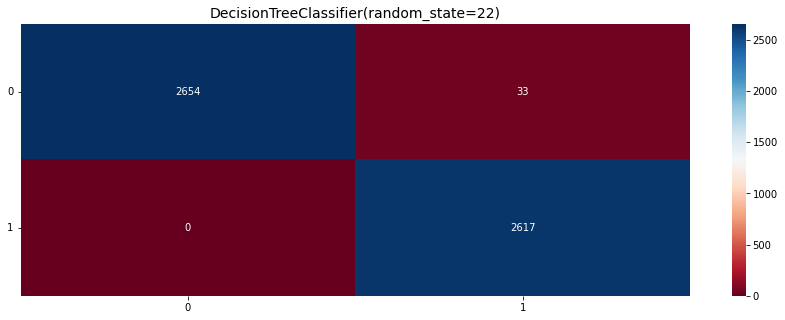

------------------------------------------------------------------------------------------
RandomForestClassifier(random_state=22)
model score: 0.998


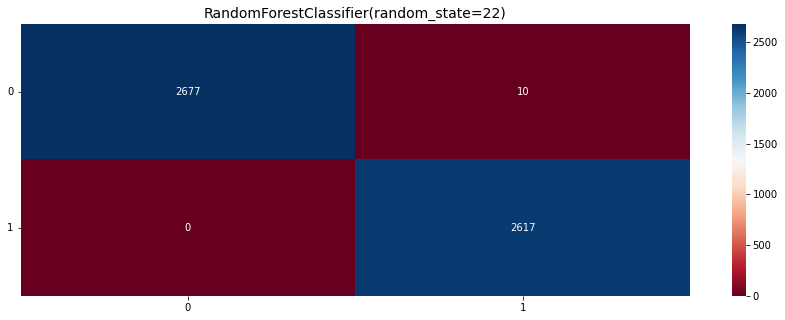

------------------------------------------------------------------------------------------
AdaBoostClassifier(random_state=22)
model score: 0.833


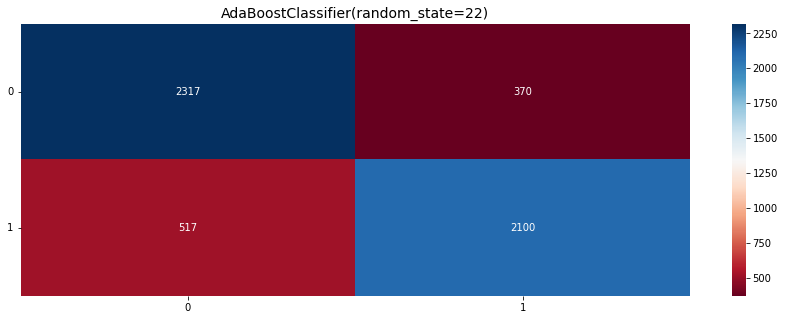

------------------------------------------------------------------------------------------
GradientBoostingClassifier(random_state=22)
model score: 0.928


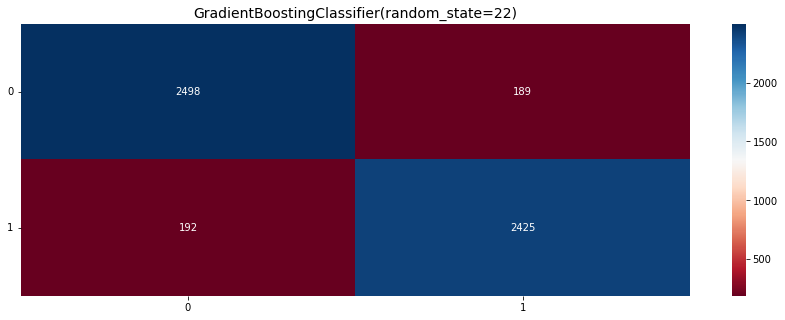

------------------------------------------------------------------------------------------
ExtraTreesClassifier(random_state=22)
model score: 0.999


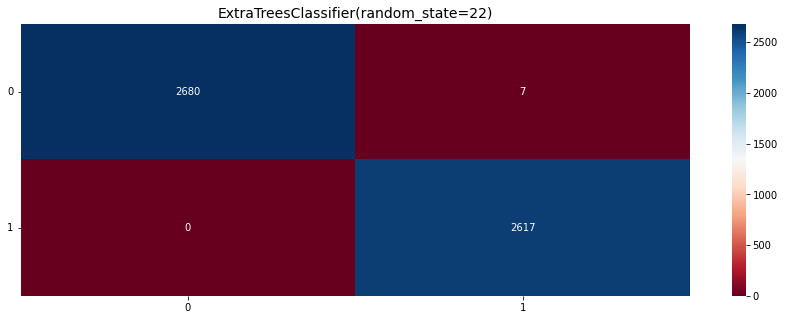

------------------------------------------------------------------------------------------


In [ ]:
for classifier in classifiers_list:
    pipe = Pipeline(steps=[("stdscaler", StandardScaler()), ("classifier", classifier)])
    pipe.fit(X_train, y_train)
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

    # Matriz de confusão com cada modelo
    from sklearn.metrics import confusion_matrix

    y_pred = pipe.predict(X_test)

    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(15,5))
    sns.heatmap(conf,annot=True,fmt="d",cmap='RdBu')
    plt.title(classifier,fontsize=14)
    plt.yticks(rotation =0)
    plt.show()
    print("---"*30)

**Considerações:** O resultado foi ainda melhor no ExtraTreesClassifier, vamos utilizá-lo sozinho para baixar o pickle.

ExtraTreesClassifier: 
Model score: 0.999


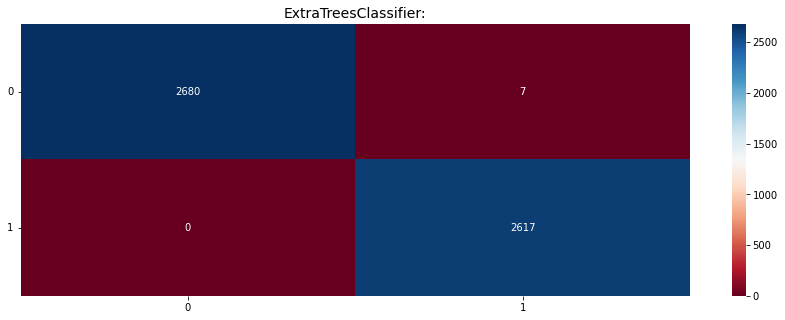

------------------------------------------------------------------------------------------


In [ ]:
pipeETC = Pipeline(steps=[("stdscaler", StandardScaler()), ("etc", ExtraTreesClassifier(random_state=rs))])
pipeETC.fit(X_train, y_train)
print('ExtraTreesClassifier: ')
print("Model score: %.3f" % pipeETC.score(X_test, y_test))

y_pred = pipeETC.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,5))
sns.heatmap(conf,annot=True,fmt="d",cmap='RdBu')
plt.title('ExtraTreesClassifier:',fontsize=14)
plt.yticks(rotation =0)
plt.show()
print("---"*30)

In [ ]:
import pickle
pickle.dump(pipeETC, open(file='Modelo_Decision_MELI.pkl', mode='wb'))

In [ ]:
# Prevendo falhas em equipamentos que não falharam ainda

df_predict = df.copy()
ids_remover = falhas['device'].tolist()

df_predict = df_predict[~df_predict['device'].isin(ids_remover)]

df_predict = df_predict.drop(columns={'device','date','failure'})

In [ ]:
df_predict

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,215630672,56,0,52,6,407438,0,0,7
1,61370680,0,3,0,6,403174,0,0,0
2,173295968,0,0,0,12,237394,0,0,0
3,79694024,0,0,0,6,410186,0,0,0
4,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...
124489,18310224,0,0,0,10,353705,8,8,0
124490,172556680,96,107,4,11,332792,0,0,13
124491,19029120,4832,0,0,11,350410,0,0,0
124492,226953408,0,0,0,12,358980,0,0,0


In [ ]:
X_new_processed = pipeETC.named_steps['stdscaler'].transform(df_predict)

In [ ]:
y_new = pipeETC.predict(X_new_processed)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
# Aplicando array de previsões como coluna no df_predict
df_predict['failure'] = y_new

In [ ]:
df_predict['failure'].value_counts()

0    113781
Name: failure, dtype: int64

Utilizando o modelo e os dados de dispositivos até o momento, identificamos que não terão falhas nos equipamentos que ainda não falharam.

## Obrigado.